In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, poisson
import numpy as np

## Bernoulli

### Generating

In [3]:
# Define the probability of success (p)
p = 0.7
num_samples = 20

In [4]:

# Generate a single Bernoulli trial outcome
single_outcome = bernoulli.rvs(p)
print(f"Single Bernoulli outcome: {single_outcome}")

Single Bernoulli outcome: 1


In [5]:
# Generate multiple Bernoulli trial outcomes
samples = bernoulli.rvs(p, size=num_samples)
print(f"Multiple Bernoulli samples: {samples}")

Multiple Bernoulli samples: [0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1]


### Distribution

In [8]:
# Probability of failure (x=0)
prob_failure = bernoulli.pmf(0, p)
# Probability of success (x=1)
prob_success = bernoulli.pmf(1, p)
print(f"Probability of failure (0): {prob_failure}", "\n" 
      f"Probability of success (1): {prob_success}")

Probability of failure (0): 0.30000000000000004 
Probability of success (1): 0.7


In [9]:
# CDF at 1 (probability of success or less)
cdf_at_1 = bernoulli.cdf(1, p)
print(f"CDF at 1: {cdf_at_1}")

CDF at 1: 1.0


### Visualization

In [ ]:
num_samples = 1000
samples = bernoulli.rvs(p, size=num_samples)

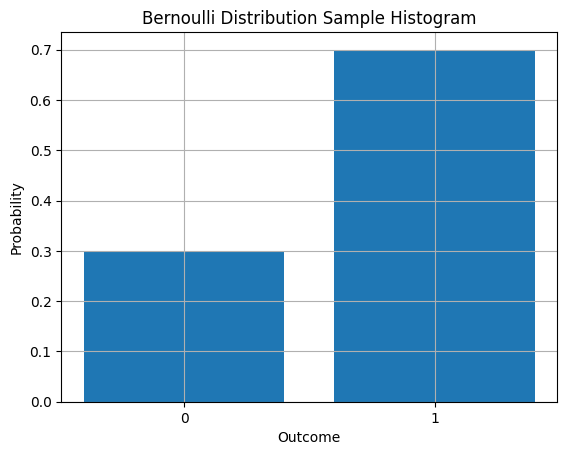

In [10]:
# Plotting the histogram of generated samples
plt.hist(samples, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8, density=True)
plt.xticks([0, 1])
plt.title('Bernoulli Distribution Sample Histogram')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

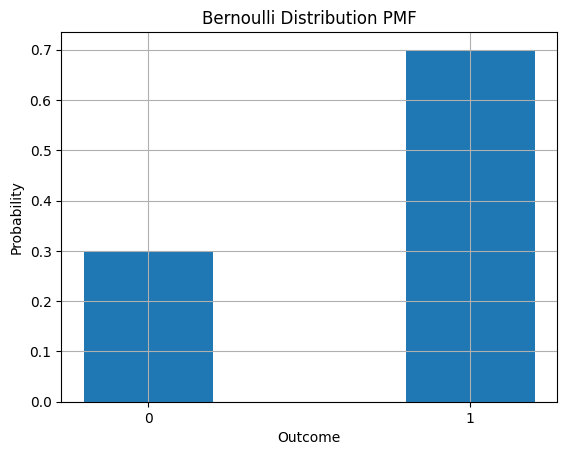

In [11]:
# Plotting the PMF
outcomes = [0, 1]
pmf_values = [bernoulli.pmf(0, p), bernoulli.pmf(1, p)]
plt.bar(outcomes, pmf_values, width=0.4)
plt.xticks([0, 1])
plt.title('Bernoulli Distribution PMF')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

## Binomial

The probability of getting exactly $k$ successes in $n$ independent Bernoulli trials (with the same rate $p$) is given by the probability mass function:
$$\binom{n}{k}p^k(1-p)^{n-k}$$
where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$

### Generating

In [14]:
n = 10  # Number of trials
p = 0.6 # Probability of success

In [21]:
# Generate 10 random samples from a binomial distribution
# with n trials and a p probability of success
samples = np.random.binomial(n=n, p=p, size=10)
print(samples)

[4 6 5 6 5 6 5 5 7 7]


In [22]:
samples = np.random.binomial(n=n, p=p, size=1000)

### Distribution

In [16]:
# Probability of getting exactly 3 heads in 5 coin flips
pmf_value = binom.pmf(k=3, n=n, p=p)
print(f"Probability of exactly 3 heads: {pmf_value}")

Probability of exactly 3 heads: 0.042467327999999964


In [17]:
# Probability of getting 2 or fewer heads in 5 coin flips
cdf_value = binom.cdf(k=2, n=n, p=p)
print(f"Probability of 2 or fewer heads: {cdf_value}")

Probability of 2 or fewer heads: 0.012294553600000006


### Visualization

In [19]:
# Create an array of possible number of successes
k_values = np.arange(0, n + 1)

# Calculate the PMF for each k_value
pmf_values = binom.pmf(k_values, n=n, p=p)

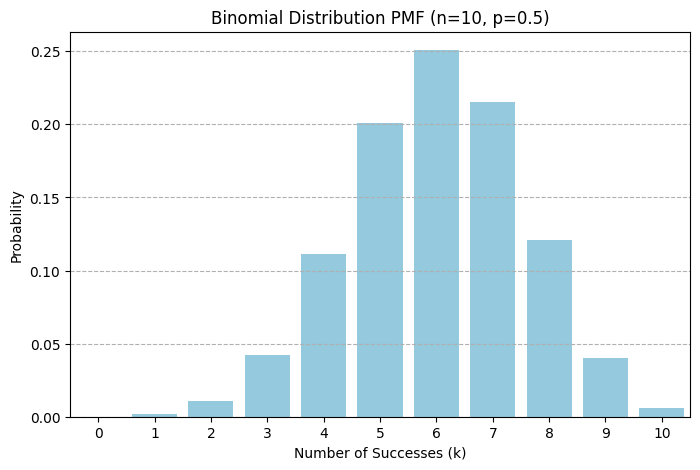

In [20]:
# Plot the PMF
plt.figure(figsize=(8, 5))
sns.barplot(x=k_values, y=pmf_values, color='skyblue')
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--')
plt.show()

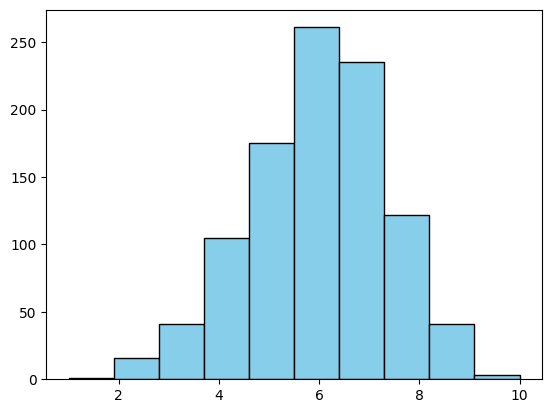

In [23]:
plt.hist(samples, bins=10, edgecolor='black', color='skyblue') # bins=30 creates 30 equal-width bins
plt.show()

### Financial excercises

#### Cash Flow Forecasting

**Scenario**: A company has 50 clients, and each client has a 90% chance of making their payment on time. 

**Question**: What is the probability of receiving payments from exactly 48 clients?

**Application**: Use the binomial formula with $n=50, k=48,$ and $p=0.90$ to find the probability, helping with liquidity management. 

In [35]:
n=50
p=0.9
k=48

In [36]:
pmf_value = binom.pmf(k=k, n=n, p=p)
print(f"The probability of receiving payments from exactly 48 clients: {pmf_value}")

The probability of receiving payments from exactly 48 clients: 0.07794289665391535


In [37]:
# Create an array of possible number of successes
k_values = np.arange(0, n + 1)

# Calculate the PMF for each k_value
pmf_values = binom.pmf(k_values, n, p)

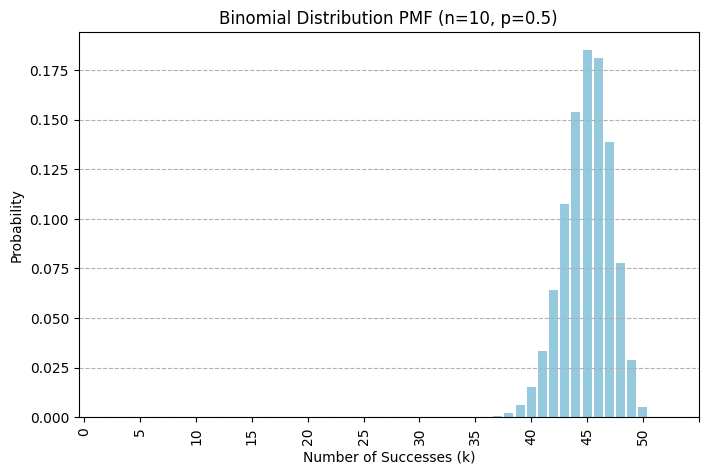

In [39]:
# Plot the PMF
plt.figure(figsize=(8, 5))
sns.barplot(x=k_values, y=pmf_values, color='skyblue')
plt.xticks(np.arange(0, n+6, step=5), rotation=90)  # Set label locations.
# plt.xticks(rotation=90)
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Credit Risk Assessment

**Scenario**: A bank holds 100 loans, and each loan has a 5% chance of defaulting. 

**Question**: What is the probability that exactly 3 of these loans will default?

**Application**: Apply the binomial distribution with $n=100, r=3$, and $p=0.05$ to estimate the number of defaults and assess overall risk.

In [28]:
n=100
k=3
p=0.05

In [30]:
pmf_value = binom.pmf(k=k, n=n, p=p)
print(f"The probability that exactly 3 of these loans will default: {pmf_value}")

The probability that exactly 3 of these loans will default: 0.13957567793089534


In [32]:
# Create an array of possible number of successes
k_values = np.arange(0, n + 1)

# Calculate the PMF for each k_value
pmf_values = binom.pmf(k_values, n, p)

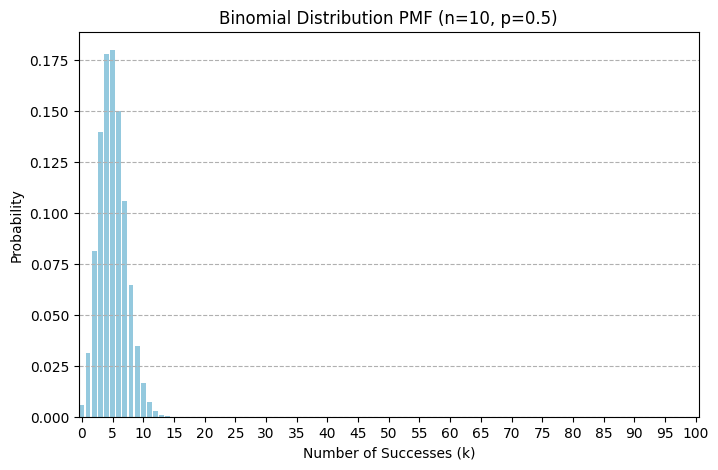

In [33]:
# Plot the PMF
plt.figure(figsize=(8, 5))
sns.barplot(x=k_values, y=pmf_values, color='skyblue')
plt.xticks(np.arange(0, 101, step=5))  # Set label locations.
# plt.xticks(rotation=90)
plt.title('Binomial Distribution PMF (n=10, p=0.5)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Credit risk: Loan portfolio default probability

A bank has a portfolio of 20 independent personal loans. 
The historical probability of any single customer defaulting on a loan is 10%.

In [40]:
# Determine the number of trials (n) and the probability of success (p). 
# A "success" in this case is a loan default.
n=20
p=0.1
q=1-p

In [41]:
# Calculate the probability of a specific outcome: 
# Find the probability that exactly 3 customers in the portfolio will default.
pmf_value = binom.pmf(k=3, n=n, p=p)
print(f"chance of exactly 3 customers defaulting: {pmf_value}")

chance of exactly 3 customers defaulting: 0.19011987137619904


In [42]:
# Calculate the cumulative probability: 
# Find the probability that no more than 2 customers will default.
cdf_value = binom.cdf(k=2, n=n, p=p)
print(f"chance of 2 or fewer customers defaulting: {cdf_value}")

chance of 2 or fewer customers defaulting: 0.6769268051894659


In [44]:
# Calculate the mean and standard deviation: 
# Determine the expected number of defaults and the spread of possible outcomes.
mean, variance = binom.stats(n, p)
print(f"mean: {mean}\n standard deviation: {np.sqrt(variance)}")

mean: 2.0
 standard deviation: 1.3416407864998738


In [45]:
1-binom.cdf(k=14, n=n, p=p)

np.float64(9.481304630298837e-12)

#### Option pricing: The single-period binomial model

A stock is currently trading at $50. 
In one year, its price is expected to either increase by 20% or decrease by 10%. 
A European call option on this stock has a strike price of $52 and an expiration date of one year. 
The annual risk-free interest rate is 5%.

In [46]:
# Construct the binomial tree
u = 50 * (1+0.2)
d = 50 * (1-0.1)

In [47]:
# Calculate the option's payoffs
Cu = max(u - 52, 0)
Cd = max(d - 52, 0)
print(f"Up-state payoff (Cu): {Cu}")
print(f"Down-state payoff (Cd): {Cd}")

Up-state payoff (Cu): 8.0
Down-state payoff (Cd): 0


In [48]:
# Find the risk-neutral probability (\(p\))
r=0.05
p = ((1+r)*50-d)/(u-d)

In [49]:
# Value the call option (\(C_{0}\))
C0 = (p*Cu+(1-p)*Cd)/(1+r)

## Poisson Random Variables

The Poisson distribution is a discrete probability distribution that models the number of events occurring within a fixed interval of time or space, given a known constant average rate of occurrence and independence of events.

Under a Poisson distribution with the expectation of $\lambda$ events in a given interval, the probability of $k$ events in the same interval is

$$\frac{\lambda^ke^{-\lambda}}{k!}$$

### Generating

**Lambda (λ)**: The average rate at which events occur within the given interval. 
This is the single parameter that characterizes the Poisson distribution

In [50]:
lam = 5

In [51]:
samples = poisson.rvs(lam, size=1000)
print(f"First 10 samples: {samples[:10]}")

First 10 samples: [ 4  1 10  5  1  7  8  3  6  6]


### Distribution

In [53]:
k=3

In [54]:
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=3 | λ=5) = 0.1403738958142805


In [55]:
cumulative_probability = poisson.cdf(k, lam)
print(f"P(X<={k} | λ={lam}) = {cumulative_probability}")

P(X<=3 | λ=5) = 0.2650259152973616


### Visualization

In [56]:
x = np.arange(0, 10)  # Range of possible events
pmf_values = poisson.pmf(x, lam)

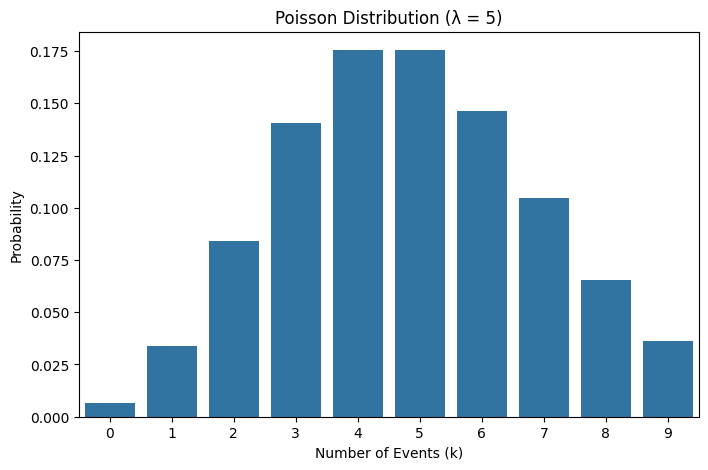

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(x=x, y=pmf_values)
plt.title(f'Poisson Distribution (λ = {lam})')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.show()

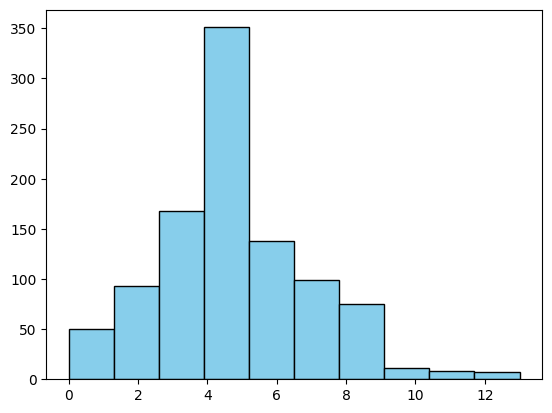

In [59]:
plt.hist(samples, bins=10, edgecolor='black', color='skyblue') # bins=30 creates 30 equal-width bins
plt.show()

### Financial Excercises

#### Credit risk modeling for a loan portfolio

A bank has a large portfolio of consumer loans. 
Based on historical data, the average number of loan defaults in this portfolio is 3 per quarter. 
Assuming defaults occur randomly and independently, a Poisson distribution is a suitable model.

In [60]:
lam = 3
k = 4

In [61]:
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=4 | λ=3) = 0.16803135574154085


In [62]:
cumulative_probability = poisson.cdf(k, lam)
print(f"P(X<={k} | λ={lam}) = {cumulative_probability}")

P(X<=4 | λ=3) = 0.8152632445237722


In [63]:
print(f"P(X > {k} | λ={lam}) = {1-cumulative_probability}")

P(X > 4 | λ=3) = 0.1847367554762278


#### Operational risk in a financial institution

A fintech company's trading server experiences an average of 1.2 system failures per month. 
The failures are rare and occur randomly.

In [64]:
lam = 1.2
k = 3

In [65]:
# What is the probability of exactly k system failures next month?
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=3 | λ=1.2) = 0.08674393303071422


In [66]:
# What is the probability of fewer than 2 system failures next month?
k = 2
cumulative_probability = poisson.cdf(k-1, lam)
print(f"P(X<={k} | λ={lam}) = {cumulative_probability}")

P(X<=2 | λ=1.2) = 0.6626272662068446


In [67]:
# The company defines a "crisis month" as one with 4 or more system failures. 
# What is the probability of a crisis month?
k = 4
cumulative_probability = poisson.cdf(k-1, lam)
print(f"P(X<={k-1} | λ={lam}) = {cumulative_probability}")

P(X<=3 | λ=1.2) = 0.9662310318143443


In [68]:
print(f"P(X>={k} | λ={lam}) = {1-cumulative_probability}")

P(X>=4 | λ=1.2) = 0.03376896818565567


#### Insurance claims frequency

An insurance company receives an average of 6 claims per week for a certain type of policy. 
Claims are filed independently and at a constant rate.

In [ ]:
lam = 6
k = 8

In [69]:
# What is the probability of receiving exactly 8 claims next week?
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=4 | λ=1.2) = 0.026023179909214246


#### Portfolio rebalancing

An investment analyst uses a statistical model where the number of buy or sell orders for a particular stock follows a Poisson distribution. 
The analyst observes an average of 4 trades per minute during a 10-minute trading period.

In [70]:
lam = 4
k = 5

In [71]:
# What is the probability of observing exactly 4 trades in a single minute?
probability = poisson.pmf(k, lam)
print(f"P(X={k} | λ={lam}) = {probability}")

P(X=5 | λ=4) = 0.1562934518505317


In [72]:
# What is the probability of observing 10 or more trades over the 10-minute period?
lam = 40
k = 10
cumulative_probability = poisson.cdf(k-1, lam)
print(f"P(X<={k-1} | λ={lam}) = {cumulative_probability}")

P(X<=9 | λ=40) = 3.925932226286184e-09


In [73]:
print(f"P(X>={k} | λ={lam}) = {1-cumulative_probability}")

P(X>=10 | λ=40) = 0.9999999960740678
